In [1]:
import sys

sys.path.append("..")
sys.path.append("../..")
sys.path.append("../../src")

import os
import matplotlib.pyplot as plt
from functional_autoencoders.util import pickle_load
from plots import plot_runs_and_medians, set_plot_style_publication

In [2]:
DATA_OUTPUT_DIR = "../../tmp/experiments/exp_rec_mse_vs_downsample_ratio/data"

mse_results = {}
for run_idx_str in os.listdir(DATA_OUTPUT_DIR):
    result = pickle_load(os.path.join(DATA_OUTPUT_DIR, run_idx_str, "data.pickle"))
    mse_vs_mask_ratio = result["additional_data"]["mse_vs_size"]
    for mask_ratio, mse in mse_vs_mask_ratio.items():
        if mask_ratio not in mse_results:
            mse_results[mask_ratio] = []
        mse_results[mask_ratio].append(mse)

mse_results_sorted = {
    k: v for k, v in sorted(mse_results.items(), key=lambda item: item[0])
}

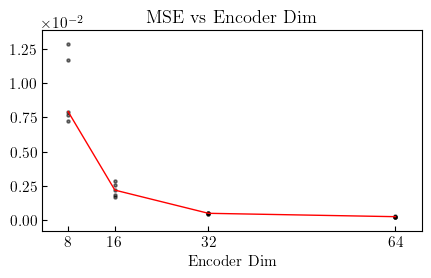

In [3]:
SAVE_DIR = None
# SAVE_DIR = '../../figures/rec_mse_vs_downsample_ratio'
# os.makedirs(SAVE_DIR, exist_ok=True)

set_plot_style_publication()

ys = mse_results_sorted

fig, ax = plt.subplots(1, 1)
plot_runs_and_medians(
    ax,
    ys,
    "MSE vs Encoder Dim",
    logy=10,
    xticklabels=ys.keys(),
    labelx="Encoder Dim",
)

fig.set_size_inches(4.9, 2.6)

if SAVE_DIR is not None:
    fig.savefig(f"{SAVE_DIR}/ns_superres.pdf")